# Curso IA UBA

Creado por [Pablo Casas](https://twitter.com/pabloc_ds)


--- 

## Autoencoders en Keras 


<img src="https://www.pyimagesearch.com/wp-content/uploads/2020/02/keras_denoising_autoencoder_header.png" width=300px>

### 2) Carga de datos y librerías

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#!pip install funpymodeling
#from funpymodeling.exploratory import status, freq_tbl, profiling_num
#from funpymodeling.data_prep import todf


Ejemplo basado en: https://www.machinecurve.com/index.php/2019/12/26/how-to-visualize-the-encoded-state-of-an-autoencoder-with-keras/


In [ ]:
'''
  Visualizing the encoded state of a simple autoencoder created with the Keras Functional API
  with Keract.
'''
import keras
from keras.layers import Input, Dense
from keras.datasets import mnist
from keras.models import Model
import matplotlib.pyplot as plt

# Model configuration
img_width, img_height = 28, 28
initial_dimension = img_width * img_height #784
validation_split = 0.2
verbosity = 1
encoded_dim = 50

# Load MNIST dataset
(input_train, target_train), (input_test, target_test) = mnist.load_data()

# Reshape data
input_train = input_train.reshape(input_train.shape[0], initial_dimension)
input_test = input_test.reshape(input_test.shape[0], initial_dimension)
input_shape = (initial_dimension, )

# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [ ]:
# Define the layers
inputs = Input(shape=input_shape)
encoding_layer = Dense(encoded_dim, activation='relu')(inputs) # embedding!
decoding_layer = Dense(initial_dimension, activation='sigmoid')(encoding_layer)

# Instantiate the autoencoder
autoencoder = Model(inputs, decoding_layer, name='full_autoencoder')

# Instantiate the encoder
encoder = Model(inputs, encoding_layer, name='encoder')

# Instantiate the decoder
encoded_input = Input(shape=(encoded_dim, ))
final_ae_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, final_ae_layer(encoded_input), name='decoder')

# Compile the autoencoder
encoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
decoder( )

In [ ]:
# Arquitecturas
encoder.summary()
decoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                39250     
Total params: 39,250
Trainable params: 39,250
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 784)               39984     
Total params: 39,984
Trainable params: 39,984
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.summary()

Model: "full_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               39984     
Total params: 79,234
Trainable params: 79,234
Non-trainable params: 0
_________________________________________________________________


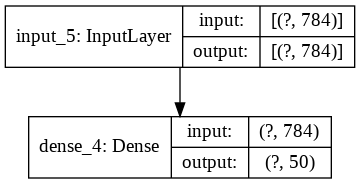

In [ ]:
keras.utils.plot_model(encoder, show_shapes=True)

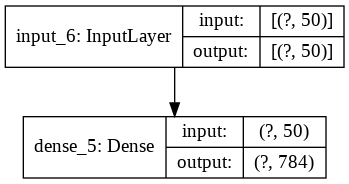

In [ ]:
keras.utils.plot_model(decoder, show_shapes=True)

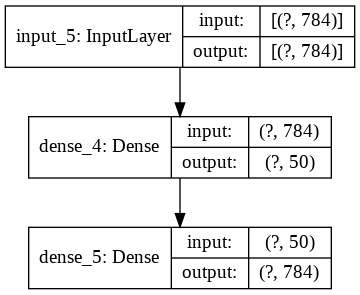

In [ ]:
keras.utils.plot_model(autoencoder, show_shapes=True)

In [ ]:
# Fit data
autoencoder.fit(input_train, input_train, epochs=10, batch_size=128, validation_split=validation_split)

Epoch 1/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2213 - val_loss: 0.1512
Epoch 2/10
375/375 [==============================] - 2s 6ms/step - loss: 0.1342 - val_loss: 0.1204
Epoch 3/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1118 - val_loss: 0.1046
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0995 - val_loss: 0.0954
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0917 - val_loss: 0.0894
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0867 - val_loss: 0.0855
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0837 - val_loss: 0.0834
Epoch 8/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0819 - val_loss: 0.0821
Epoch 9/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0810 - val_loss: 0.0812
Epoch 10/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0803 - val_loss: 0.0809

In [ ]:
def plot_img_AE(input_sample, autoencoder):
  fig, axes = plt.subplots(1, 2)
  fig.set_size_inches(6, 3.5)

  input_sample_reshaped = input_sample.reshape((28, 28))
  
  reconstruction = autoencoder.predict([input_sample])
  reconsstruction_reshaped = reconstruction.reshape((28, 28))

  axes[0].imshow(input_sample_reshaped) 
  axes[0].set_title('Imágen original')
  axes[1].imshow(reconsstruction_reshaped)
  axes[1].set_title('Reconstrucción con AE')
  plt.show()

In [ ]:
input_sample = input_test[9:10,]
input_sample.shape

(1, 784)

In [ ]:
input_sample = input_test[10,]
input_sample=input_sample.reshape([1,-1])
input_sample.shape

(1, 784)

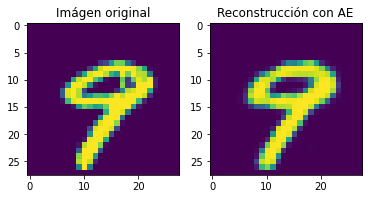

In [ ]:
input_sample=input_test[9,].reshape([1,-1])

plot_img_AE(input_sample, autoencoder) # clasificacion img -> 9, AE img -> img

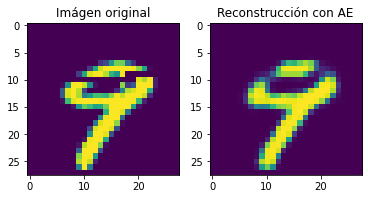

In [ ]:
# Reconstruyo el 9
input_sample2=input_test[9,].reshape([1,-1]).copy()
input_sample2[0,270:300]=0
plot_img_AE(input_sample2, autoencoder)

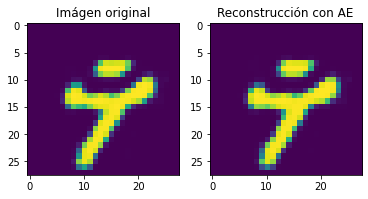

In [ ]:
rec1 = autoencoder.predict([input_sample2])
rec2 = autoencoder.predict([rec1])
rec3 = autoencoder.predict([rec2])
plot_img_AE(rec3, autoencoder)


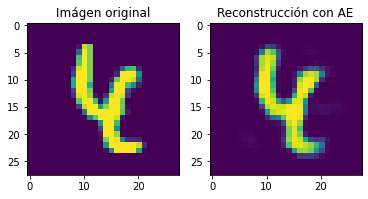

In [ ]:
# Le saco el ruido (suavizó) la punta del 4
input_sample3 = input_test[160,].reshape([1,-1])
plot_img_AE(input_sample3, autoencoder)

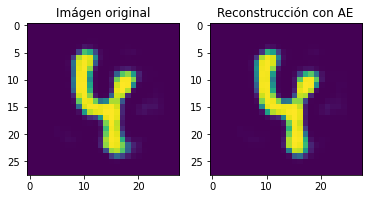

In [ ]:
rec1 = autoencoder.predict([input_sample3])
rec2 = autoencoder.predict([rec1])
rec3 = autoencoder.predict([rec2])
#rec1_resh = rec1.reshape((28, 28))
plot_img_AE(rec3, autoencoder)

Muy optimista para obtener estos resultados: https://arxiv.org/pdf/1804.07723.pdf xD

## Ejercicios!

1) Generar un modelo con un espacio latente de 3 (reducción de dimensión)

2) Crear un autoencoder para los datos de fashion mnist